In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def generate_bytes_graph(file_path, title):
    bytesdata = pd.read_csv(file_path)
    bytesdata.columns = ['timestamp', 'data']
    bytesdata['floored_timestamp'] = np.floor(bytesdata['timestamp'])

    averagebytes = (bytesdata.groupby('floored_timestamp')['data'].sum() / 125000).reset_index()
    averagebytes['floored_timestamp'] -= min(averagebytes['floored_timestamp'])

    plt.figure(figsize=(10, 6))
    plt.plot(averagebytes['floored_timestamp'], averagebytes['data'], label='Mbps')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Mbps')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
def generate_delay_graph(file_path, title):
    delaydata = pd.read_csv(file_path)
    delaydata.columns = ['timestamp', 'data']
    delaydata['floored_timestamp'] = np.floor(delaydata['timestamp'])

    delaystats = delaydata.groupby('floored_timestamp')['data'].agg(['min', 'max', 'median', lambda x: np.percentile(x, 90)]).reset_index()
    delaystats['floored_timestamp'] -= min(delaystats['floored_timestamp'])
    delaystats.columns = ['floored_timestamp', 'min', 'max', 'median', '90th_percentile']

    plt.figure(figsize=(12, 8))

    plt.plot(delaystats['floored_timestamp'], delaystats['min'], label='Min per Second')
    plt.plot(delaystats['floored_timestamp'], delaystats['max'], label='Max per Second')
    plt.plot(delaystats['floored_timestamp'], delaystats['median'], label='Median per Second')
    plt.plot(delaystats['floored_timestamp'], delaystats['90th_percentile'], label='90th Percentile per Second')

    plt.xlabel('Time (seconds)')
    plt.ylabel('Delay in Seconds')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [5]:
def generate_delay_graph2(file_path, title):
    delaydata = pd.read_csv(file_path)
    delaydata.columns = ['timestamp', 'data']
    delaydata['floored_timestamp'] = np.floor(delaydata['timestamp'])

    delaystats = delaydata.groupby('floored_timestamp')['data'].agg(['min', 'max', 'median', lambda x: np.percentile(x, 90)]).reset_index()
    delaystats['floored_timestamp'] -= min(delaystats['floored_timestamp'])
    delaystats.columns = ['floored_timestamp', 'min', 'max', 'median', '90th_percentile']

    plt.figure(figsize=(12, 8))

    plt.plot(delaystats['floored_timestamp'], delaystats['min'], label='Min per Second')
    plt.plot(delaystats['floored_timestamp'], delaystats['median'], label='Median per Second')

    plt.xlabel('Time (seconds)')
    plt.ylabel('Delay in Seconds')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

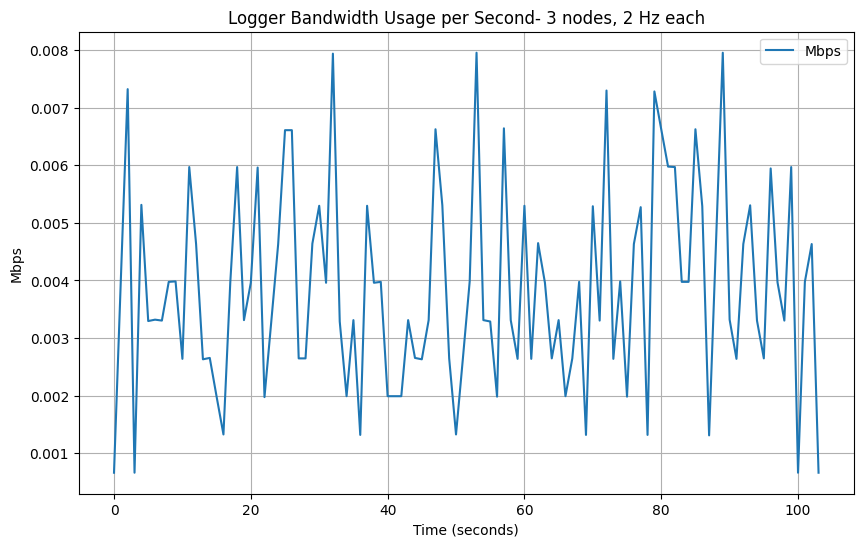

In [6]:
generate_bytes_graph('./data/bytesData_-_2hz_3_nodes.csv', 'Logger Bandwidth Usage per Second- 3 nodes, 2 Hz each')

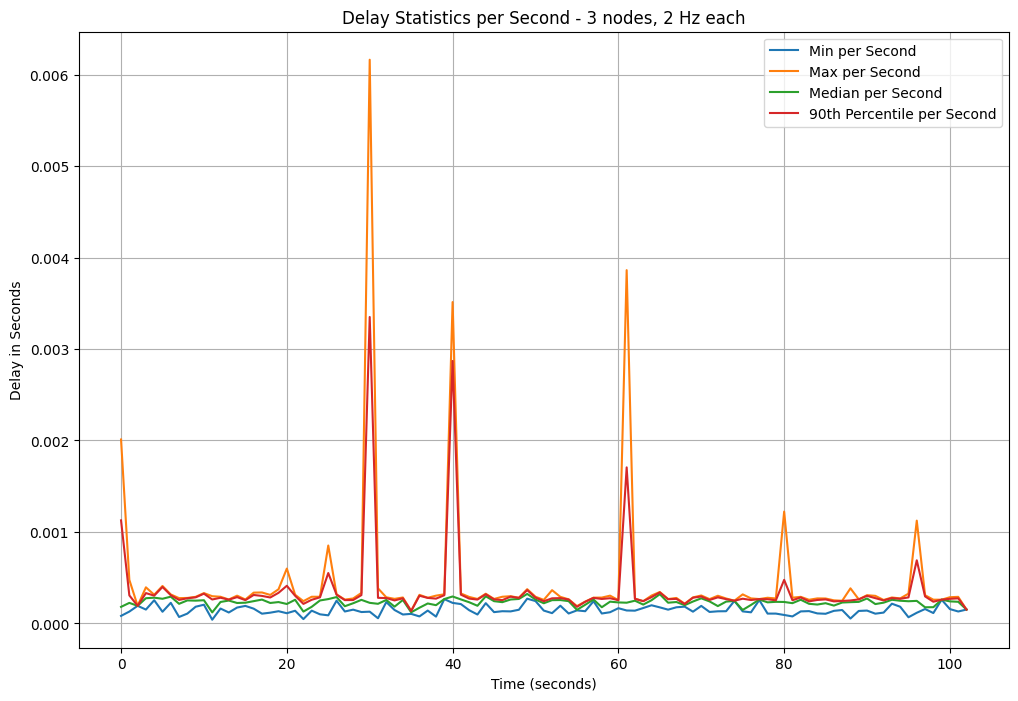

In [7]:
generate_delay_graph("./data/delayData_-_2hz_3_nodes.csv", 'Delay Statistics per Second - 3 nodes, 2 Hz each')

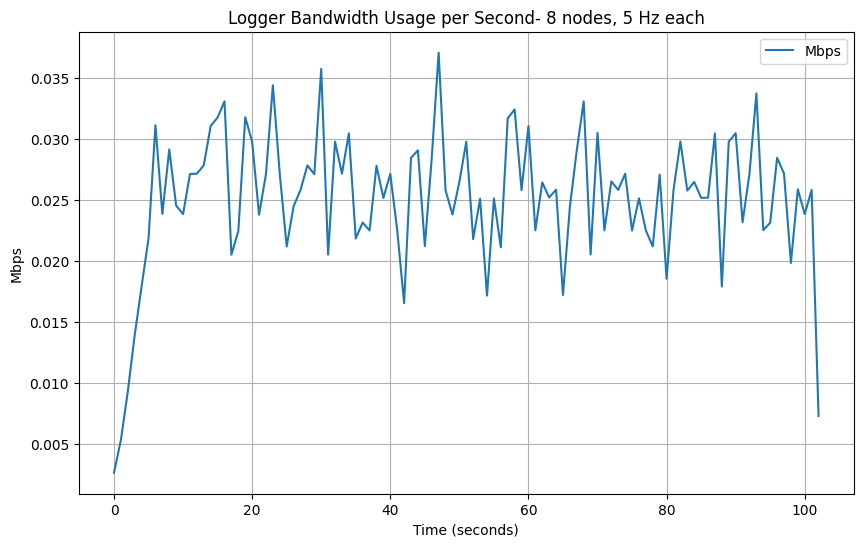

In [8]:
generate_bytes_graph('./data/bytesData_-_5hz_8_nodes.csv', 'Logger Bandwidth Usage per Second- 8 nodes, 5 Hz each')

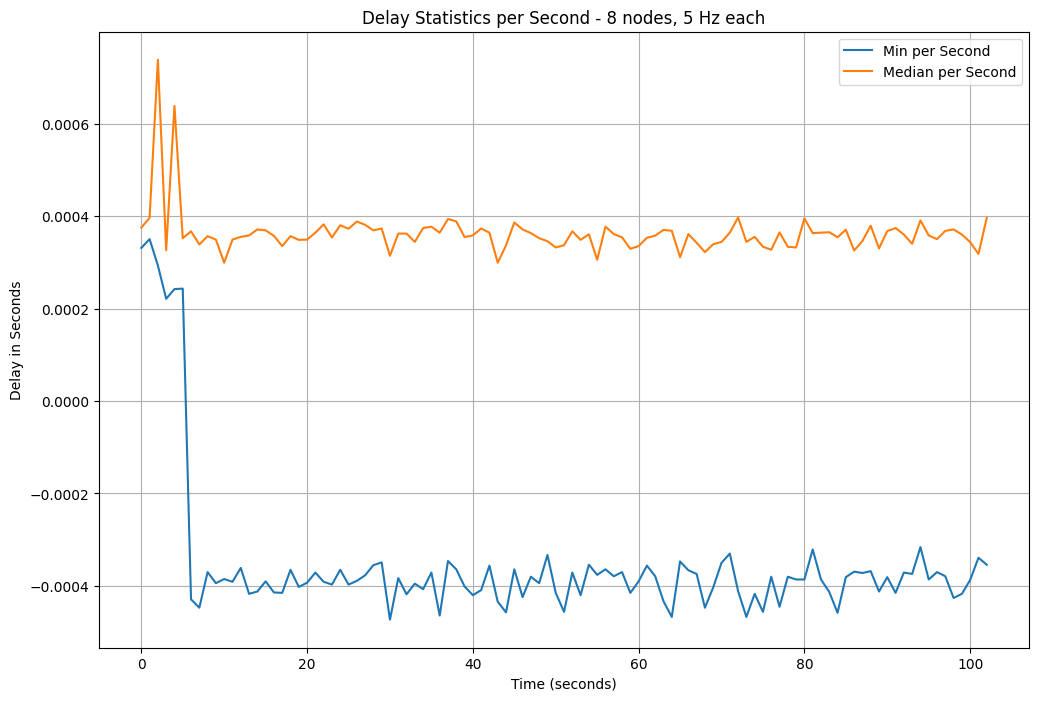

In [9]:
generate_delay_graph2('./data/delayData_-_5hz_8_nodes.csv', 'Delay Statistics per Second - 8 nodes, 5 Hz each')

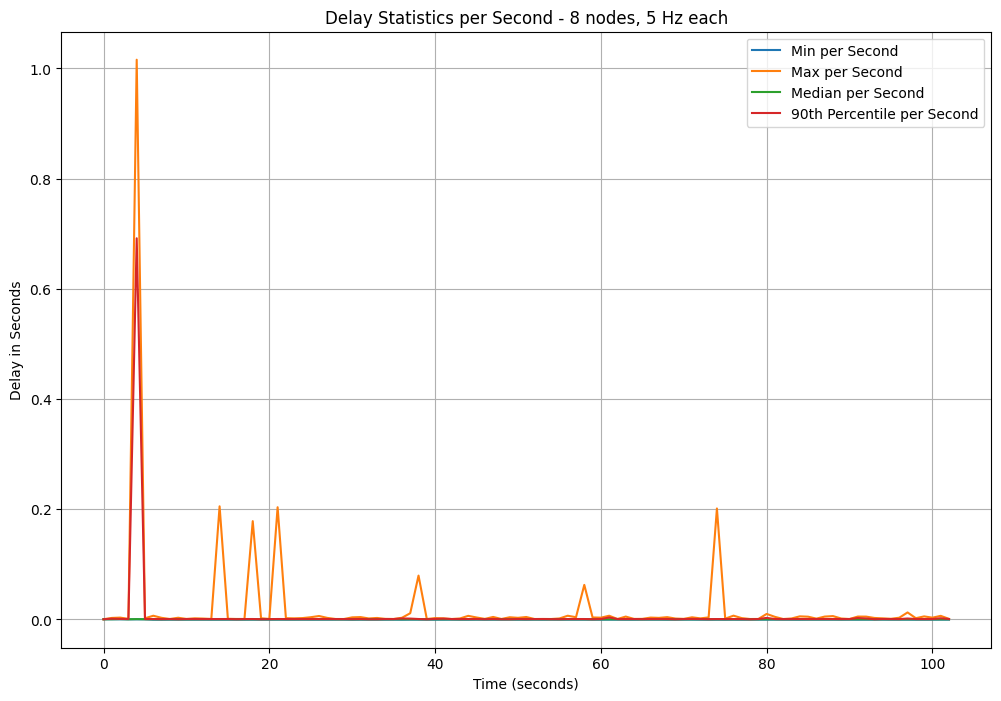

In [10]:
generate_delay_graph('./data/delayData_-_5hz_8_nodes.csv', 'Delay Statistics per Second - 8 nodes, 5 Hz each')